# Evaluation gridsearch results

In [39]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from clustercausal.utils.Utils import *
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
gridssearch_directory =  'clustercausal\experiments\_results\ClusterPC_30min' #first_gridsearch_directory
gridssearch_directory = gridssearch_directory.replace('\\', '/')
print(f"Gridsearch directory: {gridssearch_directory}")
data_no_sid = load_data(gridssearch_directory)
gridssearch_directory =  'clustercausal\experiments\_results\\new_search_alpha' #first_gridsearch_directory
gridssearch_directory = gridssearch_directory.replace('\\', '/')
print(f"Gridsearch directory: {gridssearch_directory}")
data_alpha_search = load_data(gridssearch_directory)
gridssearch_directory =  'clustercausal\experiments\_results\\new_search_samplesize' #first_gridsearch_directory
gridssearch_directory = gridssearch_directory.replace('\\', '/')
print(f"Gridsearch directory: {gridssearch_directory}")
data_sample_search = load_data(gridssearch_directory)
gridssearch_directory =  'clustercausal\experiments\_results\Dense_graphs_partial_gridsearch' #first_gridsearch_directory
gridssearch_directory = gridssearch_directory.replace('\\', '/')
print(f"Gridsearch directory: {gridssearch_directory}")
data_gridsearch = load_data(gridssearch_directory)
gridssearch_directory =  'clustercausal\experiments\_results\Dense_graphs_partial_gridsearch_with_40s' #first_gridsearch_directory
gridssearch_directory = gridssearch_directory.replace('\\', '/')
print(f"Gridsearch directory: {gridssearch_directory}")
data_gridsearch_40s = load_data(gridssearch_directory)

Gridsearch directory: clustercausal/experiments/_results/ClusterPC_30min
Gridsearch directory: clustercausal/experiments/_results/new_search_alpha
Gridsearch directory: clustercausal/experiments/_results/new_search_samplesize
Gridsearch directory: clustercausal/experiments/_results/Dense_graphs_partial_gridsearch
Gridsearch directory: clustercausal/experiments/_results/Dense_graphs_partial_gridsearch_with_40s


In [41]:
data_no_sid.head()

,base_adj_f1_score,base_adj_false_negative,base_adj_false_positive,base_adj_precision,base_adj_recall,base_adj_true_negative,base_adj_true_positive,base_arrow_f1_score,base_arrow_f1_score_ce,base_arrow_false_negative,base_arrow_false_negative_ce,base_arrow_false_positive,base_arrow_false_positive_ce,base_arrow_precision,base_arrow_precision_ce,base_arrow_recall,base_arrow_recall_ce,base_arrow_true_negative,base_arrow_true_negative_ce,base_arrow_true_positive,base_arrow_true_positive_ce,base_base_shd,cluster_adj_f1_score,cluster_adj_false_negative,cluster_adj_false_positive,cluster_adj_precision,cluster_adj_recall,cluster_adj_true_negative,cluster_adj_true_positive,cluster_arrow_f1_score,cluster_arrow_f1_score_ce,cluster_arrow_false_negative,cluster_arrow_false_negative_ce,cluster_arrow_false_positive,cluster_arrow_false_positive_ce,cluster_arrow_precision,cluster_arrow_precision_ce,cluster_arrow_recall,cluster_arrow_recall_ce,cluster_arrow_true_negative,cluster_arrow_true_negative_ce,cluster_arrow_true_positive,cluster_arrow_true_positive_ce,cluster_cluster_shd,dag_method,distribution_type,n_clusters,n_edges,n_nodes,noise_scale,sample_size,scm_method,seed,weight_range
0,0.585366,16.0,1.0,0.923077,0.428571,16.0,12.0,0.114286,0.210526,26.0,10.0,5.0,5.0,0.285714,0.285714,0.071429,0.166667,67.0,83.0,2.0,2.0,22.0,0.734694,10.0,3.0,0.857143,0.642857,14.0,18.0,0.653061,0.888889,12.0,2.0,5.0,2.0,0.761905,0.888889,0.571429,0.888889,67.0,80.0,16.0,16.0,15.0,erdos_renyi,exp,3.0,30.0,10.0,1.0,1000.0,linear,None,"(-1, 2)"
1,0.604651,17.0,0.0,1.000000,0.433333,15.0,13.0,0.153846,0.272727,27.0,10.0,6.0,6.0,0.333333,0.333333,0.100000,0.230769,64.0,81.0,3.0,3.0,23.0,0.760000,11.0,1.0,0.950000,0.633333,14.0,19.0,0.530612,0.702703,17.0,6.0,6.0,5.0,0.684211,0.722222,0.433333,0.684211,64.0,76.0,13.0,13.0,17.0,erdos_renyi,gauss,3.0,30.0,10.0,1.0,1000.0,linear,None,"(-1, 2)"
2,0.512821,17.0,2.0,0.833333,0.370370,16.0,10.0,0.153846,0.300000,24.0,7.0,9.0,7.0,0.250000,0.300000,0.111111,0.300000,64.0,83.0,3.0,3.0,26.0,0.585366,15.0,2.0,0.857143,0.444444,16.0,12.0,0.410256,0.727273,19.0,4.0,4.0,2.0,0.666667,0.800000,0.296296,0.666667,69.0,86.0,8.0,8.0,19.0,erdos_renyi,gp,3.0,30.0,10.0,1.0,1000.0,nonlinear,None,"(-1, 2)"
3,0.684211,12.0,0.0,1.000000,0.520000,20.0,13.0,0.315789,0.461538,19.0,7.0,7.0,7.0,0.461538,0.461538,0.240000,0.461538,68.0,80.0,6.0,6.0,19.0,0.666667,10.0,5.0,0.750000,0.600000,15.0,15.0,0.651163,0.965517,11.0,1.0,4.0,0.0,0.777778,1.000000,0.560000,0.933333,71.0,85.0,14.0,14.0,15.0,erdos_renyi,gumbel,3.0,30.0,10.0,1.0,1000.0,linear,None,"(-1, 2)"
4,0.808511,8.0,1.0,0.950000,0.703704,17.0,19.0,0.272727,0.342857,21.0,13.0,11.0,10.0,0.352941,0.375000,0.222222,0.315789,62.0,71.0,6.0,6.0,19.0,0.807692,6.0,4.0,0.840000,0.777778,14.0,21.0,0.627451,0.780488,11.0,5.0,8.0,4.0,0.666667,0.800000,0.592593,0.761905,65.0,75.0,16.0,16.0,14.0,erdos_renyi,mim,3.0,30.0,10.0,1.0,1000.0,nonlinear,None,"(-1, 2)"


In [42]:
selected_metrics = ['base_adj_precision', 'cluster_adj_precision', 'base_adj_recall', 'cluster_adj_recall', 'base_adj_f1_score', 'cluster_adj_f1_score', 'base_base_shd', 'cluster_cluster_shd']

## Alpha Gridsearch

In [62]:
data = data_alpha_search
data.head()

,base_adj_f1_score,base_adj_false_negative,base_adj_false_positive,base_adj_precision,base_adj_recall,base_adj_true_negative,base_adj_true_positive,base_arrow_f1_score,base_arrow_f1_score_ce,base_arrow_false_negative,base_arrow_false_negative_ce,base_arrow_false_positive,base_arrow_false_positive_ce,base_arrow_precision,base_arrow_precision_ce,base_arrow_recall,base_arrow_recall_ce,base_arrow_true_negative,base_arrow_true_negative_ce,base_arrow_true_positive,base_arrow_true_positive_ce,base_base_shd,base_sid_lower,base_sid_upper,cluster_adj_f1_score,cluster_adj_false_negative,cluster_adj_false_positive,cluster_adj_precision,cluster_adj_recall,cluster_adj_true_negative,cluster_adj_true_positive,cluster_arrow_f1_score,cluster_arrow_f1_score_ce,cluster_arrow_false_negative,cluster_arrow_false_negative_ce,cluster_arrow_false_positive,cluster_arrow_false_positive_ce,cluster_arrow_precision,cluster_arrow_precision_ce,cluster_arrow_recall,cluster_arrow_recall_ce,cluster_arrow_true_negative,cluster_arrow_true_negative_ce,cluster_arrow_true_positive,cluster_arrow_true_positive_ce,cluster_cluster_shd,cluster_sid_lower,cluster_sid_upper,alpha,dag_method,distribution_type,n_clusters,n_edges,n_nodes,noise_scale,sample_size,scm_method,seed,true_sid_lower,true_sid_upper,weight_range
0,1.000000,0.0,0.0,1.0,1.000000,38.0,7.0,0.833333,0.833333,2.0,2.0,0.0,0.0,1.000000,1.000000,0.714286,0.714286,93.0,93.0,5.0,5.0,0.0,0.0,4.0,1.000000,0.0,0.0,1.000000,1.000000,38.0,7.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.00,1.0,1.000000,1.000000,93.0,93.0,7.0,7.0,0.0,0.0,4.0,0.01,erdos_renyi,exp,4.0,10.0,10.0,1.0,1000.0,linear,None,0.0,4.0,"(-1, 2)"
1,1.000000,0.0,0.0,1.0,1.000000,38.0,7.0,0.833333,0.833333,2.0,2.0,0.0,0.0,1.000000,1.000000,0.714286,0.714286,93.0,93.0,5.0,5.0,0.0,0.0,7.0,0.875000,0.0,2.0,0.777778,1.000000,36.0,7.0,0.800000,0.923077,1.0,1.0,2.0,0.0,0.75,1.0,0.857143,0.857143,91.0,93.0,6.0,6.0,2.0,0.0,7.0,0.03,erdos_renyi,exp,4.0,10.0,10.0,1.0,1000.0,linear,None,0.0,7.0,"(-1, 2)"
2,1.000000,0.0,0.0,1.0,1.000000,38.0,7.0,0.727273,0.727273,3.0,3.0,0.0,0.0,1.000000,1.000000,0.571429,0.571429,93.0,93.0,4.0,4.0,0.0,0.0,12.0,1.000000,0.0,0.0,1.000000,1.000000,38.0,7.0,0.833333,0.833333,2.0,2.0,0.0,0.0,1.00,1.0,0.714286,0.714286,93.0,93.0,5.0,5.0,0.0,0.0,12.0,0.05,erdos_renyi,exp,4.0,10.0,10.0,1.0,1000.0,linear,None,0.0,12.0,"(-1, 2)"
3,0.842105,3.0,0.0,1.0,0.727273,34.0,8.0,0.470588,0.571429,7.0,4.0,2.0,2.0,0.666667,0.666667,0.363636,0.500000,87.0,90.0,4.0,4.0,5.0,25.0,40.0,0.842105,3.0,0.0,1.000000,0.727273,34.0,8.0,0.777778,0.933333,4.0,1.0,0.0,0.0,1.00,1.0,0.636364,0.875000,89.0,92.0,7.0,7.0,3.0,14.0,38.0,0.10,erdos_renyi,exp,4.0,10.0,10.0,1.0,1000.0,linear,None,0.0,12.0,"(-1, 2)"
4,0.875000,2.0,0.0,1.0,0.777778,36.0,7.0,NaN,NaN,9.0,7.0,0.0,0.0,NaN,NaN,0.000000,0.000000,91.0,93.0,0.0,0.0,2.0,10.0,31.0,0.900000,0.0,2.0,0.818182,1.000000,34.0,9.0,0.842105,0.941176,1.0,1.0,2.0,0.0,0.80,1.0,0.888889,0.888889,89.0,91.0,8.0,8.0,2.0,0.0,19.0,0.01,erdos_renyi,gauss,4.0,10.0,10.0,1.0,1000.0,linear,None,0.0,19.0,"(-1, 2)"


In [69]:
selected_metrics = ['base_adj_precision', 'cluster_adj_precision', 'base_adj_recall', 'cluster_adj_recall', 'base_adj_f1_score', 'cluster_adj_f1_score', 'base_base_shd', 'cluster_cluster_shd']
data.groupby(data['alpha']).mean()[selected_metrics]

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score,base_base_shd,cluster_cluster_shd
alpha,,,,,,,,
0.01,0.949070,0.830861,0.741809,0.851123,0.823181,0.836858,6.3125,5.5625
0.03,0.900336,0.801679,0.800356,0.851528,0.830024,0.816561,5.3125,5.2500
0.05,0.848687,0.771526,0.803042,0.887615,0.807450,0.819452,6.9375,6.0625
0.10,0.877520,0.735141,0.757808,0.839243,0.807326,0.776807,8.6875,8.8750


## Sample size Gridsearch

In [71]:
data = data_sample_search
data.head()

,base_adj_f1_score,base_adj_false_negative,base_adj_false_positive,base_adj_precision,base_adj_recall,base_adj_true_negative,base_adj_true_positive,base_arrow_f1_score,base_arrow_f1_score_ce,base_arrow_false_negative,base_arrow_false_negative_ce,base_arrow_false_positive,base_arrow_false_positive_ce,base_arrow_precision,base_arrow_precision_ce,base_arrow_recall,base_arrow_recall_ce,base_arrow_true_negative,base_arrow_true_negative_ce,base_arrow_true_positive,base_arrow_true_positive_ce,base_base_shd,base_sid_lower,base_sid_upper,cluster_adj_f1_score,cluster_adj_false_negative,cluster_adj_false_positive,cluster_adj_precision,cluster_adj_recall,cluster_adj_true_negative,cluster_adj_true_positive,cluster_arrow_f1_score,cluster_arrow_f1_score_ce,cluster_arrow_false_negative,cluster_arrow_false_negative_ce,cluster_arrow_false_positive,cluster_arrow_false_positive_ce,cluster_arrow_precision,cluster_arrow_precision_ce,cluster_arrow_recall,cluster_arrow_recall_ce,cluster_arrow_true_negative,cluster_arrow_true_negative_ce,cluster_arrow_true_positive,cluster_arrow_true_positive_ce,cluster_cluster_shd,cluster_sid_lower,cluster_sid_upper,alpha,dag_method,distribution_type,n_clusters,n_edges,n_nodes,noise_scale,sample_size,scm_method,seed,true_sid_lower,true_sid_upper,weight_range
0,0.933333,1.0,0.0,1.0,0.875000,37.0,7.0,0.769231,0.833333,3.0,2.0,0.0,0.0,1.0,1.0,0.625000,0.714286,92.0,93.0,5.0,5.0,1.0,2.0,9.0,0.933333,1.0,0.0,1.000,0.875,37.0,7.0,0.857143,0.923077,2.0,1.0,0.0,0.0,1.000000,1.00,0.75,0.857143,92.0,93.0,6.0,6.0,1.0,2.0,9.0,0.05,erdos_renyi,exp,4.0,10.0,10.0,1.0,100.0,linear,None,0.0,7.0,"(-1, 2)"
1,0.933333,1.0,0.0,1.0,0.875000,37.0,7.0,0.400000,0.444444,6.0,5.0,0.0,0.0,1.0,1.0,0.250000,0.285714,92.0,93.0,2.0,2.0,1.0,11.0,27.0,0.875000,1.0,1.0,0.875,0.875,36.0,7.0,0.800000,0.923077,2.0,1.0,1.0,0.0,0.857143,1.00,0.75,0.857143,91.0,93.0,6.0,6.0,2.0,4.0,26.0,0.05,erdos_renyi,exp,4.0,10.0,10.0,1.0,500.0,linear,None,0.0,15.0,"(-1, 2)"
2,0.923077,1.0,0.0,1.0,0.857143,38.0,6.0,0.727273,0.800000,3.0,2.0,0.0,0.0,1.0,1.0,0.571429,0.666667,93.0,94.0,4.0,4.0,1.0,3.0,10.0,0.933333,0.0,1.0,0.875,1.000,37.0,7.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.00,1.00,1.000000,93.0,93.0,7.0,7.0,1.0,0.0,12.0,0.05,erdos_renyi,exp,4.0,10.0,10.0,1.0,1000.0,linear,None,0.0,12.0,"(-1, 2)"
3,1.000000,0.0,0.0,1.0,1.000000,41.0,4.0,0.333333,0.333333,3.0,3.0,1.0,1.0,0.5,0.5,0.250000,0.250000,95.0,95.0,1.0,1.0,1.0,3.0,7.0,0.888889,0.0,1.0,0.800,1.000,40.0,4.0,0.750000,0.750000,1.0,1.0,1.0,1.0,0.750000,0.75,0.75,0.750000,95.0,95.0,3.0,3.0,2.0,3.0,5.0,0.05,erdos_renyi,exp,4.0,10.0,10.0,1.0,5000.0,linear,None,0.0,10.0,"(-1, 2)"
4,0.857143,2.0,0.0,1.0,0.750000,37.0,6.0,NaN,NaN,8.0,6.0,0.0,0.0,NaN,NaN,0.000000,0.000000,92.0,94.0,0.0,0.0,2.0,10.0,40.0,0.777778,1.0,3.0,0.700,0.875,34.0,7.0,0.533333,0.727273,4.0,3.0,3.0,0.0,0.571429,1.00,0.50,0.571429,89.0,93.0,4.0,4.0,4.0,4.0,34.0,0.05,erdos_renyi,gauss,4.0,10.0,10.0,1.0,100.0,linear,None,0.0,14.0,"(-1, 2)"


In [72]:
data[['base_base_shd', 'cluster_cluster_shd']].groupby(data['sample_size']).mean()

,base_base_shd,cluster_cluster_shd
sample_size,,
100.0,8.3125,8.1875
500.0,8.5000,7.1875
1000.0,6.0625,6.1875
5000.0,8.3125,6.3750


In [73]:
selected_metrics = ['base_adj_precision', 'cluster_adj_precision', 'base_adj_recall', 'cluster_adj_recall', 'base_adj_f1_score', 'cluster_adj_f1_score', 'base_base_shd', 'cluster_cluster_shd']
data.groupby(data['sample_size']).mean()[selected_metrics]

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score,base_base_shd,cluster_cluster_shd
sample_size,,,,,,,,
100.0,0.910308,0.813750,0.599716,0.685702,0.713792,0.735478,8.3125,8.1875
500.0,0.862252,0.781379,0.714950,0.774046,0.770018,0.769931,8.5000,7.1875
1000.0,0.916674,0.761801,0.774707,0.859645,0.828375,0.795216,6.0625,6.1875
5000.0,0.851304,0.792485,0.795290,0.912648,0.813227,0.844198,8.3125,6.3750


## Bigger Gridsearch

In [51]:
data = pd.concat([data_gridsearch, data_gridsearch_40s])
data.head()

,base_adj_f1_score,base_adj_false_negative,base_adj_false_positive,base_adj_precision,base_adj_recall,base_adj_true_negative,base_adj_true_positive,base_arrow_f1_score,base_arrow_f1_score_ce,base_arrow_false_negative,base_arrow_false_negative_ce,base_arrow_false_positive,base_arrow_false_positive_ce,base_arrow_precision,base_arrow_precision_ce,base_arrow_recall,base_arrow_recall_ce,base_arrow_true_negative,base_arrow_true_negative_ce,base_arrow_true_positive,base_arrow_true_positive_ce,base_base_shd,base_sid_lower,base_sid_upper,cluster_adj_f1_score,cluster_adj_false_negative,cluster_adj_false_positive,cluster_adj_precision,cluster_adj_recall,cluster_adj_true_negative,cluster_adj_true_positive,cluster_arrow_f1_score,cluster_arrow_f1_score_ce,cluster_arrow_false_negative,cluster_arrow_false_negative_ce,cluster_arrow_false_positive,cluster_arrow_false_positive_ce,cluster_arrow_precision,cluster_arrow_precision_ce,cluster_arrow_recall,cluster_arrow_recall_ce,cluster_arrow_true_negative,cluster_arrow_true_negative_ce,cluster_arrow_true_positive,cluster_arrow_true_positive_ce,cluster_cluster_shd,cluster_sid_lower,cluster_sid_upper,alpha,dag_method,distribution_type,n_clusters,n_edges,n_nodes,noise_scale,sample_size,scm_method,seed,true_sid_lower,true_sid_upper,weight_range
0,0.483516,43.0,4.0,0.846154,0.338462,121.0,22.0,0.255814,0.564103,54.0,11.0,10.0,6.0,0.523810,0.647059,0.169231,0.500000,325.0,372.0,11.0,11.0,53.0,338.0,362.0,0.660870,27.0,12.0,0.760000,0.584615,113.0,38.0,0.637168,0.972973,29.0,2.0,12.0,0.0,0.750000,1.000000,0.553846,0.947368,323.0,362.0,36.0,36.0,39.0,166.0,306.0,0.05,erdos_renyi,exp,10.0,61.0,20.0,1.0,1000.0,linear,None,0.0,96.0,"(-1, 2)"
1,0.556962,33.0,2.0,0.916667,0.400000,133.0,22.0,0.285714,0.571429,45.0,12.0,5.0,3.0,0.666667,0.769231,0.181818,0.454545,340.0,375.0,10.0,10.0,38.0,194.0,287.0,0.673469,22.0,10.0,0.767442,0.600000,125.0,33.0,0.659794,0.984615,23.0,1.0,10.0,0.0,0.761905,1.000000,0.581818,0.969697,335.0,367.0,32.0,32.0,32.0,128.0,212.0,0.05,erdos_renyi,gauss,10.0,61.0,20.0,1.0,1000.0,linear,None,0.0,69.0,"(-1, 2)"
2,0.487805,40.0,2.0,0.909091,0.333333,128.0,20.0,0.227848,0.473684,51.0,11.0,10.0,9.0,0.473684,0.500000,0.150000,0.450000,330.0,371.0,9.0,9.0,51.0,309.0,331.0,0.698113,23.0,9.0,0.804348,0.616667,121.0,37.0,0.698113,1.000000,23.0,0.0,9.0,0.0,0.804348,1.000000,0.616667,1.000000,331.0,363.0,37.0,37.0,32.0,142.0,191.0,0.05,erdos_renyi,gumbel,10.0,61.0,20.0,1.0,1000.0,linear,None,0.0,49.0,"(-1, 2)"
3,0.505495,37.0,8.0,0.741935,0.383333,122.0,23.0,0.120482,0.256410,55.0,18.0,18.0,11.0,0.217391,0.312500,0.083333,0.217391,322.0,366.0,5.0,5.0,56.0,357.0,367.0,0.468468,34.0,25.0,0.509804,0.433333,105.0,26.0,0.271845,0.622222,46.0,12.0,29.0,5.0,0.325581,0.736842,0.233333,0.538462,311.0,369.0,14.0,14.0,64.0,209.0,305.0,0.05,erdos_renyi,exp,3.0,61.0,20.0,1.0,1000.0,linear,None,0.0,27.0,"(-1, 2)"
4,0.505495,41.0,4.0,0.851852,0.359375,122.0,23.0,0.247191,0.500000,53.0,12.0,14.0,10.0,0.440000,0.523810,0.171875,0.478261,322.0,367.0,11.0,11.0,55.0,291.0,315.0,0.638655,26.0,17.0,0.690909,0.593750,109.0,38.0,0.526316,0.845070,34.0,8.0,20.0,3.0,0.600000,0.909091,0.468750,0.789474,316.0,359.0,30.0,30.0,46.0,160.0,258.0,0.05,erdos_renyi,gauss,3.0,61.0,20.0,1.0,1000.0,linear,None,0.0,82.0,"(-1, 2)"


In [52]:
selected_metrics = ['base_adj_precision', 'cluster_adj_precision', 'base_adj_recall', 'cluster_adj_recall', 'base_adj_f1_score', 'cluster_adj_f1_score', 'base_base_shd', 'cluster_cluster_shd', 'base_sid_lower', 'base_sid_upper', 'cluster_sid_lower', 'cluster_sid_upper' ]
pd.DataFrame(data.mean()[selected_metrics])

C:\Users\JanMarco\AppData\Local\Temp\ipykernel_14472\3269644174.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(data.mean()[selected_metrics])


,0
base_adj_precision,0.855067
cluster_adj_precision,0.765078
base_adj_recall,0.324728
cluster_adj_recall,0.532142
base_adj_f1_score,0.448867
cluster_adj_f1_score,0.603540
base_base_shd,91.427230
cluster_cluster_shd,75.408451
base_sid_lower,340.582160
base_sid_upper,384.798122


In [53]:
data.groupby('n_clusters').mean()[selected_metrics]

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score,base_base_shd,cluster_cluster_shd,base_sid_lower,base_sid_upper,cluster_sid_lower,cluster_sid_upper
n_clusters,,,,,,,,,,,,
3.0,0.850782,0.720485,0.315636,0.495464,0.438167,0.555153,98.500000,89.129630,342.814815,382.851852,255.000000,302.925926
5.0,0.844833,0.765988,0.327170,0.530170,0.449291,0.602933,97.277778,80.018519,350.907407,396.074074,239.888889,297.648148
7.0,0.858136,0.774071,0.316910,0.542925,0.441900,0.616152,97.388889,76.944444,356.537037,403.277778,220.796296,276.666667
10.0,0.867191,0.801807,0.340047,0.561651,0.467126,0.642061,71.431373,54.372549,310.392157,355.352941,169.686275,220.627451


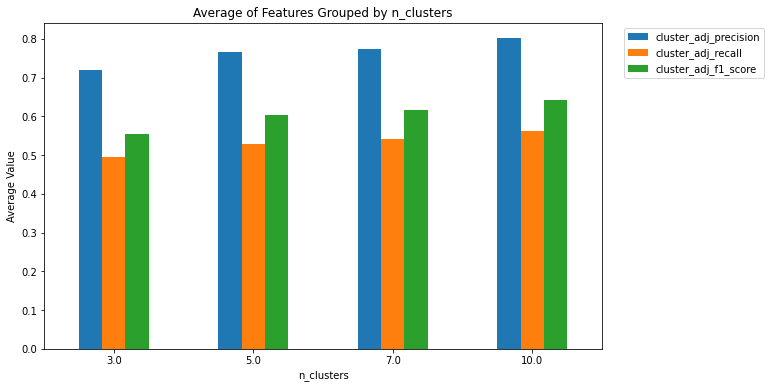

In [54]:
selected_metrics = ['cluster_adj_precision', 'cluster_adj_recall', 'cluster_adj_f1_score']
plot_data = data.groupby('n_clusters').mean()[selected_metrics]
ax = plot_data.plot(kind='bar', figsize=(10, 6))
plt.title("Average of Features Grouped by n_clusters")
plt.ylabel("Average Value")
plt.xlabel("n_clusters")
plt.xticks(rotation=0)
ax.legend(loc = 'upper right', bbox_to_anchor=(1.3, 1))
plt.show()

<AxesSubplot:>

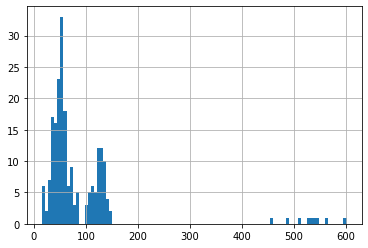

In [55]:
data['base_base_shd'].hist(bins=100)

<AxesSubplot:>

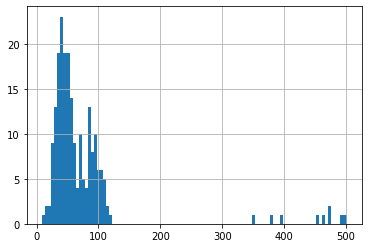

In [56]:
data['cluster_cluster_shd'].hist(bins=100)

## Older Gridsearch No SHD

In [57]:
data = data_no_sid
data.head()

,base_adj_f1_score,base_adj_false_negative,base_adj_false_positive,base_adj_precision,base_adj_recall,base_adj_true_negative,base_adj_true_positive,base_arrow_f1_score,base_arrow_f1_score_ce,base_arrow_false_negative,base_arrow_false_negative_ce,base_arrow_false_positive,base_arrow_false_positive_ce,base_arrow_precision,base_arrow_precision_ce,base_arrow_recall,base_arrow_recall_ce,base_arrow_true_negative,base_arrow_true_negative_ce,base_arrow_true_positive,base_arrow_true_positive_ce,base_base_shd,cluster_adj_f1_score,cluster_adj_false_negative,cluster_adj_false_positive,cluster_adj_precision,cluster_adj_recall,cluster_adj_true_negative,cluster_adj_true_positive,cluster_arrow_f1_score,cluster_arrow_f1_score_ce,cluster_arrow_false_negative,cluster_arrow_false_negative_ce,cluster_arrow_false_positive,cluster_arrow_false_positive_ce,cluster_arrow_precision,cluster_arrow_precision_ce,cluster_arrow_recall,cluster_arrow_recall_ce,cluster_arrow_true_negative,cluster_arrow_true_negative_ce,cluster_arrow_true_positive,cluster_arrow_true_positive_ce,cluster_cluster_shd,dag_method,distribution_type,n_clusters,n_edges,n_nodes,noise_scale,sample_size,scm_method,seed,weight_range
0,0.585366,16.0,1.0,0.923077,0.428571,16.0,12.0,0.114286,0.210526,26.0,10.0,5.0,5.0,0.285714,0.285714,0.071429,0.166667,67.0,83.0,2.0,2.0,22.0,0.734694,10.0,3.0,0.857143,0.642857,14.0,18.0,0.653061,0.888889,12.0,2.0,5.0,2.0,0.761905,0.888889,0.571429,0.888889,67.0,80.0,16.0,16.0,15.0,erdos_renyi,exp,3.0,30.0,10.0,1.0,1000.0,linear,None,"(-1, 2)"
1,0.604651,17.0,0.0,1.000000,0.433333,15.0,13.0,0.153846,0.272727,27.0,10.0,6.0,6.0,0.333333,0.333333,0.100000,0.230769,64.0,81.0,3.0,3.0,23.0,0.760000,11.0,1.0,0.950000,0.633333,14.0,19.0,0.530612,0.702703,17.0,6.0,6.0,5.0,0.684211,0.722222,0.433333,0.684211,64.0,76.0,13.0,13.0,17.0,erdos_renyi,gauss,3.0,30.0,10.0,1.0,1000.0,linear,None,"(-1, 2)"
2,0.512821,17.0,2.0,0.833333,0.370370,16.0,10.0,0.153846,0.300000,24.0,7.0,9.0,7.0,0.250000,0.300000,0.111111,0.300000,64.0,83.0,3.0,3.0,26.0,0.585366,15.0,2.0,0.857143,0.444444,16.0,12.0,0.410256,0.727273,19.0,4.0,4.0,2.0,0.666667,0.800000,0.296296,0.666667,69.0,86.0,8.0,8.0,19.0,erdos_renyi,gp,3.0,30.0,10.0,1.0,1000.0,nonlinear,None,"(-1, 2)"
3,0.684211,12.0,0.0,1.000000,0.520000,20.0,13.0,0.315789,0.461538,19.0,7.0,7.0,7.0,0.461538,0.461538,0.240000,0.461538,68.0,80.0,6.0,6.0,19.0,0.666667,10.0,5.0,0.750000,0.600000,15.0,15.0,0.651163,0.965517,11.0,1.0,4.0,0.0,0.777778,1.000000,0.560000,0.933333,71.0,85.0,14.0,14.0,15.0,erdos_renyi,gumbel,3.0,30.0,10.0,1.0,1000.0,linear,None,"(-1, 2)"
4,0.808511,8.0,1.0,0.950000,0.703704,17.0,19.0,0.272727,0.342857,21.0,13.0,11.0,10.0,0.352941,0.375000,0.222222,0.315789,62.0,71.0,6.0,6.0,19.0,0.807692,6.0,4.0,0.840000,0.777778,14.0,21.0,0.627451,0.780488,11.0,5.0,8.0,4.0,0.666667,0.800000,0.592593,0.761905,65.0,75.0,16.0,16.0,14.0,erdos_renyi,mim,3.0,30.0,10.0,1.0,1000.0,nonlinear,None,"(-1, 2)"


In [58]:
selected_metrics = ['base_adj_precision', 'cluster_adj_precision', 'base_adj_recall', 'cluster_adj_recall', 'base_adj_f1_score', 'cluster_adj_f1_score', 'base_base_shd', 'cluster_cluster_shd']
pd.DataFrame(data.mean()[selected_metrics])

C:\Users\JanMarco\AppData\Local\Temp\ipykernel_14472\267870513.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(data.mean()[selected_metrics])


,0
base_adj_precision,0.865301
cluster_adj_precision,0.792211
base_adj_recall,0.464053
cluster_adj_recall,0.598265
base_adj_f1_score,0.567359
cluster_adj_f1_score,0.643840
base_base_shd,66.762346
cluster_cluster_shd,57.851852
